SIMULAÇÃO: Impacto de Edificações com Eficiência Térmica (Solução C.2)

Solução escolhida: C.2 - Edificações com eficiência térmica
- Paredes com isolamento, ventilação cruzada, vidro duplo
- Redução de até 60% no consumo de climatização

Dados carregados: 17,928 registros
Colunas: ['Data', 'DataExcel', 'Regiao', 'Sistema', 'Classe', 'TipoConsumidor', 'Consumo', 'Consumidores', 'DataVersao']

Dados após limpeza: 15,209 registros
Período: 2004-01 a 2025-10

                       PARÂMETROS DA SIMULAÇÃO                        
----------------------------------------------------------------------
Participação da climatização no consumo residencial: 30%
Redução do consumo de climatização com eficiência: 60%
Redução efetiva no consumo residencial total: 18.0%
----------------------------------------------------------------------

Registros residenciais impactados: 1,842

                           IMPACTO NACIONAL                           
Consumo atual total (MWh)        :        10,457

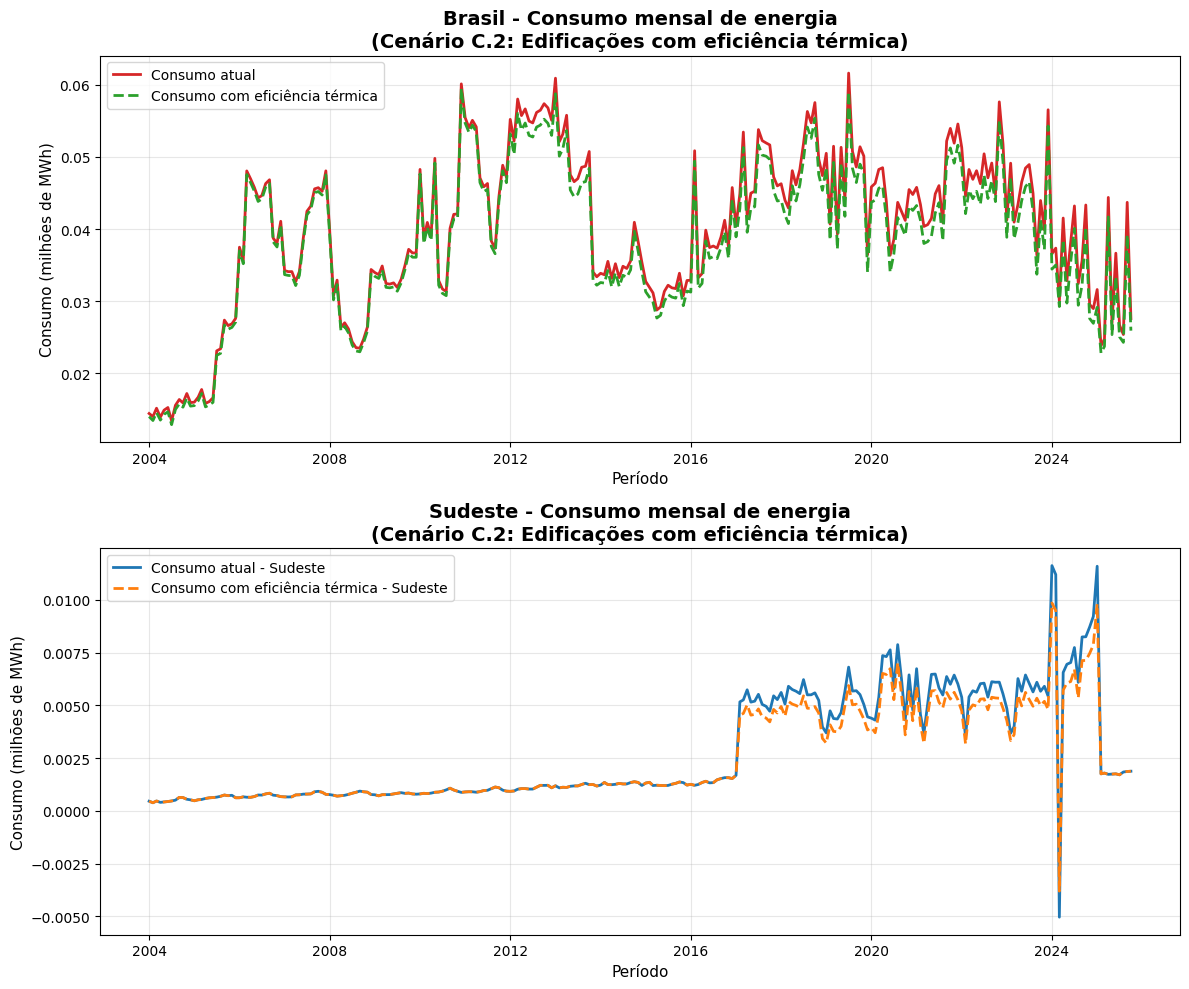


                          IMPACTO POR REGIÃO                          
Nordeste                  | Economia:      200,101.01 MWh ( 3.98%)
Centro-Oeste              | Economia:       91,034.47 MWh ( 3.52%)
Sudeste                   | Economia:       68,315.38 MWh ( 9.48%)
Norte                     | Economia:       32,446.50 MWh ( 3.13%)
Sul                       | Economia:        6,084.18 MWh ( 0.56%)

✓ Simulação concluída com sucesso!


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Configurações
plt.style.use('default')
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

print("=" * 70)
print("SIMULAÇÃO: Impacto de Edificações com Eficiência Térmica (Solução C.2)")
print("=" * 70)
print("\nSolução escolhida: C.2 - Edificações com eficiência térmica")
print("- Paredes com isolamento, ventilação cruzada, vidro duplo")
print("- Redução de até 60% no consumo de climatização")
print("=" * 70)

# 1. Leitura dos dados
df = pd.read_csv("/content/Consumo.csv")

print(f"\nDados carregados: {len(df):,} registros")
print(f"Colunas: {df.columns.tolist()}")

# 2. Preparação dos dados
df["Data_proc"] = df["Data"].astype(str).str[:6]
df["AnoMes"] = pd.to_datetime(df["Data_proc"], format="%Y%m", errors="coerce")

# Converter Consumo para numérico
df["Consumo_num"] = df["Consumo"].astype(str).str.replace(".", "", regex=False).str.replace(",", ".", regex=False)
df["Consumo_num"] = pd.to_numeric(df["Consumo_num"], errors="coerce")
df = df.dropna(subset=["AnoMes", "Consumo_num"])

print(f"\nDados após limpeza: {len(df):,} registros")
print(f"Período: {df['AnoMes'].min().strftime('%Y-%m')} a {df['AnoMes'].max().strftime('%Y-%m')}")

# 3. Aplicação do cenário de eficiência térmica
participacao_climatizacao = 0.30  # 30% do consumo residencial é climatização
reducao_climatizacao = 0.60       # 60% de redução nessa parte
fator_residencial = 1 - participacao_climatizacao * reducao_climatizacao

print(f"\n{'PARÂMETROS DA SIMULAÇÃO':^70}")
print("-" * 70)
print(f"Participação da climatização no consumo residencial: {participacao_climatizacao*100:.0f}%")
print(f"Redução do consumo de climatização com eficiência: {reducao_climatizacao*100:.0f}%")
print(f"Redução efetiva no consumo residencial total: {(1-fator_residencial)*100:.1f}%")
print("-" * 70)

# Criar coluna de consumo no cenário
df["Consumo_cenario"] = df["Consumo_num"]
mask_residencial = df["Classe"].astype(str).str.upper().str.contains("RESIDENCIAL", na=False)
df.loc[mask_residencial, "Consumo_cenario"] = df.loc[mask_residencial, "Consumo_num"] * fator_residencial

print(f"\nRegistros residenciais impactados: {mask_residencial.sum():,}")

# 4. Resultados agregados Brasil
total_atual = df["Consumo_num"].sum()
total_cenario = df["Consumo_cenario"].sum()
economia_absoluta = total_atual - total_cenario
economia_percentual = economia_absoluta / total_atual * 100

print(f"\n{'IMPACTO NACIONAL':^70}")
print("=" * 70)
print(f"Consumo atual total (MWh)        : {total_atual:>20,.2f}")
print(f"Consumo com eficiência (MWh)     : {total_cenario:>20,.2f}")
print(f"Economia absoluta (MWh)          : {economia_absoluta:>20,.2f}")
print(f"Economia percentual              : {economia_percentual:>20.2f}%")
print("=" * 70)

# 5. Séries temporais
serie_br = df.groupby("AnoMes")[["Consumo_num", "Consumo_cenario"]].sum().sort_index()

mask_sudeste = df["Regiao"].astype(str).str.upper().str.contains("SUDESTE", na=False)
df_sudeste = df[mask_sudeste].copy()
serie_sudeste = df_sudeste.groupby("AnoMes")[["Consumo_num", "Consumo_cenario"]].sum().sort_index()

# 6. Visualizações
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Gráfico Brasil
axes[0].plot(serie_br.index, serie_br["Consumo_num"] / 1e6,
             label="Consumo atual", linewidth=2, color='#d62728')
axes[0].plot(serie_br.index, serie_br["Consumo_cenario"] / 1e6,
             label="Consumo com eficiência térmica", linewidth=2,
             linestyle="--", color='#2ca02c')
axes[0].set_title("Brasil - Consumo mensal de energia\n(Cenário C.2: Edificações com eficiência térmica)",
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel("Período", fontsize=11)
axes[0].set_ylabel("Consumo (milhões de MWh)", fontsize=11)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Gráfico Sudeste
axes[1].plot(serie_sudeste.index, serie_sudeste["Consumo_num"] / 1e6,
             label="Consumo atual - Sudeste", linewidth=2, color='#1f77b4')
axes[1].plot(serie_sudeste.index, serie_sudeste["Consumo_cenario"] / 1e6,
             label="Consumo com eficiência térmica - Sudeste", linewidth=2,
             linestyle="--", color='#ff7f0e')
axes[1].set_title("Sudeste - Consumo mensal de energia\n(Cenário C.2: Edificações com eficiência térmica)",
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel("Período", fontsize=11)
axes[1].set_ylabel("Consumo (milhões de MWh)", fontsize=11)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('simulacao_eficiencia_termica.png', dpi=150, bbox_inches='tight')
print("\n✓ Gráficos gerados e salvos como 'simulacao_eficiencia_termica.png'")
plt.show()

# 7. Análise por região
print(f"\n{'IMPACTO POR REGIÃO':^70}")
print("=" * 70)
resultado_regiao = df.groupby("Regiao").agg({
    "Consumo_num": "sum",
    "Consumo_cenario": "sum"
}).reset_index()
resultado_regiao.columns = ["Região", "Consumo Atual", "Consumo Cenário"]
resultado_regiao["Economia (MWh)"] = resultado_regiao["Consumo Atual"] - resultado_regiao["Consumo Cenário"]
resultado_regiao["Economia (%)"] = (resultado_regiao["Economia (MWh)"] / resultado_regiao["Consumo Atual"]) * 100
resultado_regiao = resultado_regiao.sort_values("Economia (MWh)", ascending=False)

for _, row in resultado_regiao.iterrows():
    print(f"{row['Região']:<25} | Economia: {row['Economia (MWh)']:>15,.2f} MWh ({row['Economia (%)']:>5.2f}%)")
print("=" * 70)